In [3]:
library(ggplot2)
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
hotel_bookings <- read.csv('avocado.csv')

In [18]:
head(hotel_bookings)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


# created a scatterplot to explore the relationship between booking lead time and guests traveling with children

Warning message:
"Removed 4 rows containing missing values (geom_point)."

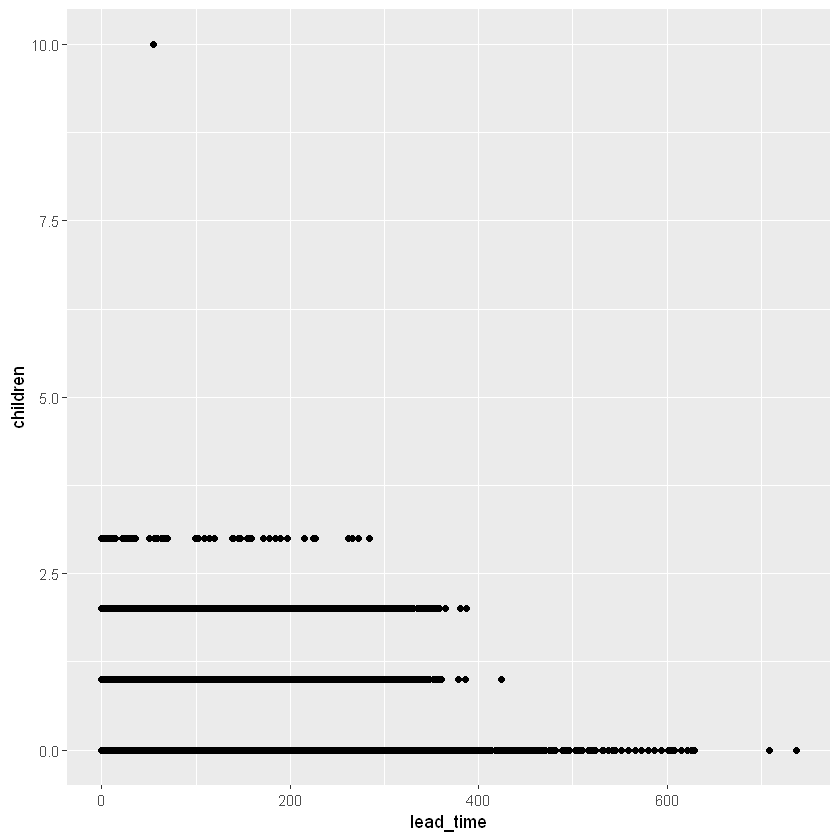

In [19]:
ggplot(data  = hotel_bookings) + geom_point(mapping = aes(x=lead_time,y=children))

# Now, your stakeholder wants to run a family-friendly promotion targeting key market segments. She wants to know which market segments generate the largest number of bookings, and where these bookings are made (city hotels or resort hotels). 

# First, you decide to create a bar chart showing each hotel type and market segment. You use different colors to represent each market segment

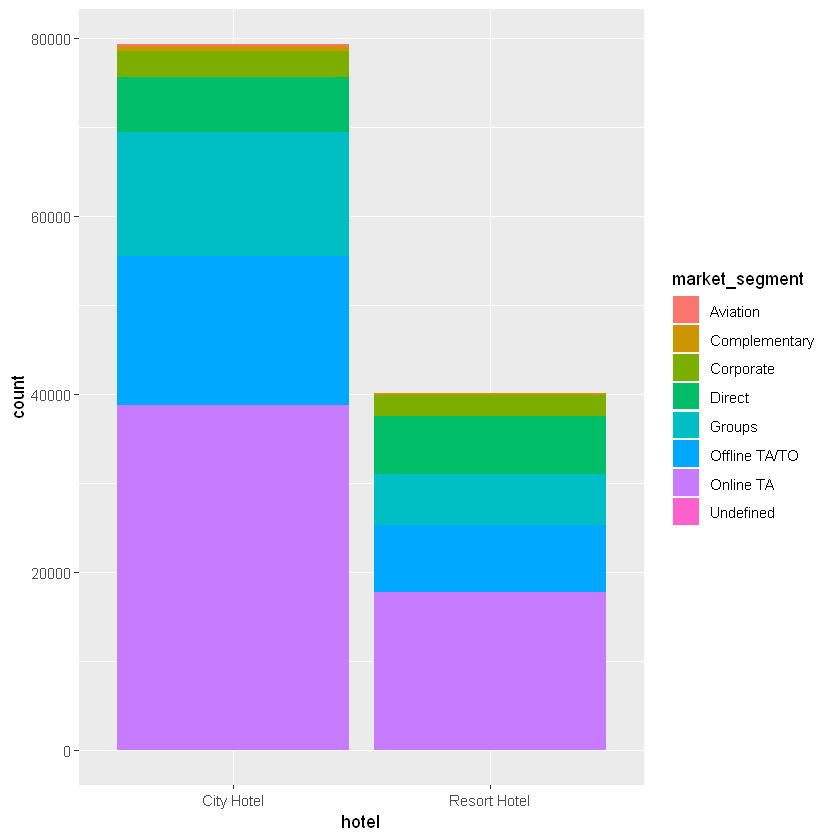

In [21]:
ggplot(data =hotel_bookings) + geom_bar(mapping = aes(x=hotel,fill=market_segment))

# you realize that it's difficult to compare the size of the market segments at the top of the bars. You want your stakeholder to be able to clearly compare each segment.   


# You decide to use the facet_wrap() function to create a separate plot for each market segment. In the parentheses of the facet_wrap() function, add the variable 'market_segment'

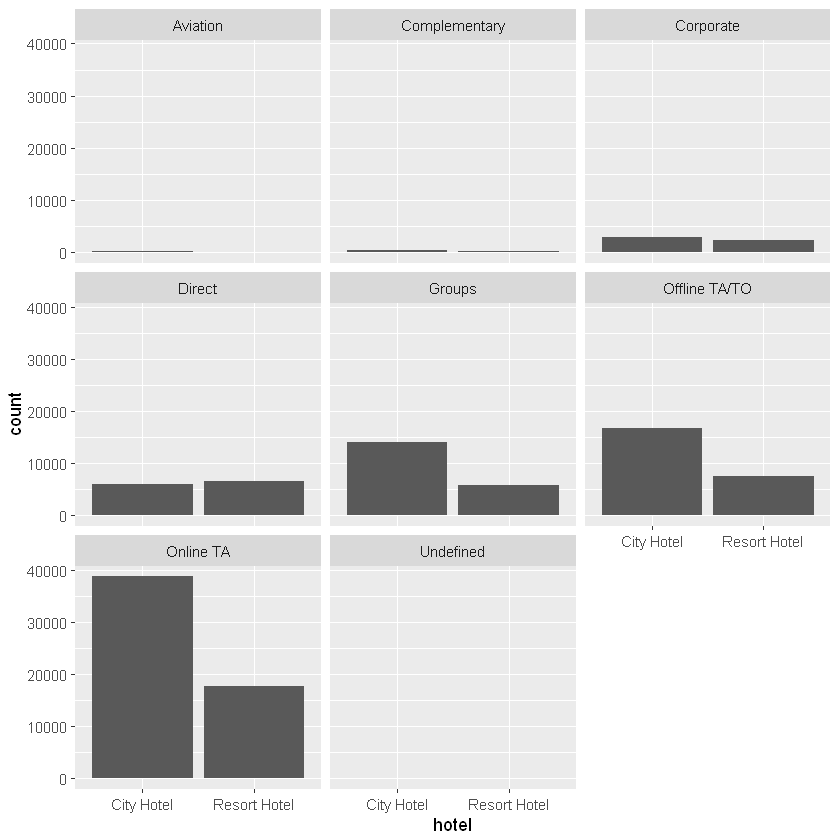

In [22]:
ggplot(data = hotel_bookings)+geom_bar(mapping = aes(x = hotel)) + facet_wrap(~market_segment)

# After considering all the data, your stakeholder decides to send the promotion to families that make online bookings for city hotels. The online segment is the fastest growing segment, and families tend to spend more at city hotels than other types of guests. 

# Your stakeholder asks if you can create a plot that shows the relationship between lead time and guests traveling with children for online bookings at city hotels. This will give her a better idea of the specific timing for the promotion. 

In [23]:
onlineta_city_hotels <- filter(hotel_bookings, 
                           (hotel=="City Hotel" & 
                             hotel_bookings$market_segment=="Online TA"))

In [26]:
View(onlineta_city_hotels)


ERROR: Error in View(onlineta_city_hotels): 'View()' not yet supported in the Jupyter R kernel


Warning message:
"Removed 1 rows containing missing values (geom_point)."

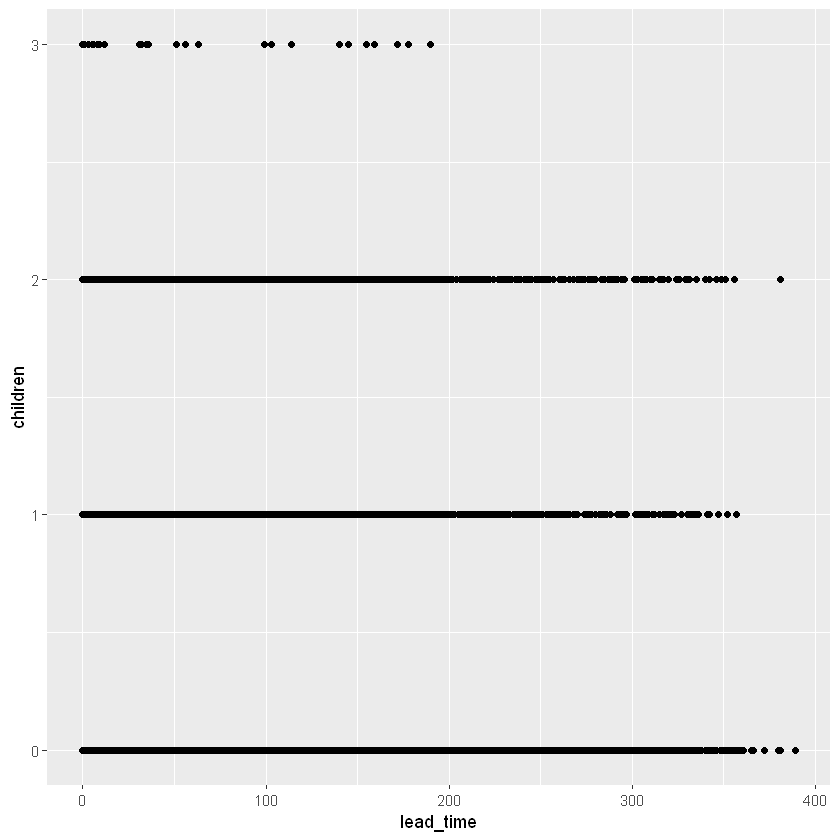

In [28]:
ggplot(data = onlineta_city_hotels) +
  geom_point(mapping = aes(x = lead_time, y = children))

In [29]:
onlineta_city_hotels_v2 <- hotel_bookings %>%
  filter(hotel=="City Hotel") %>%
  filter(market_segment=="Online TA")

Warning message:
"Removed 1 rows containing missing values (geom_point)."

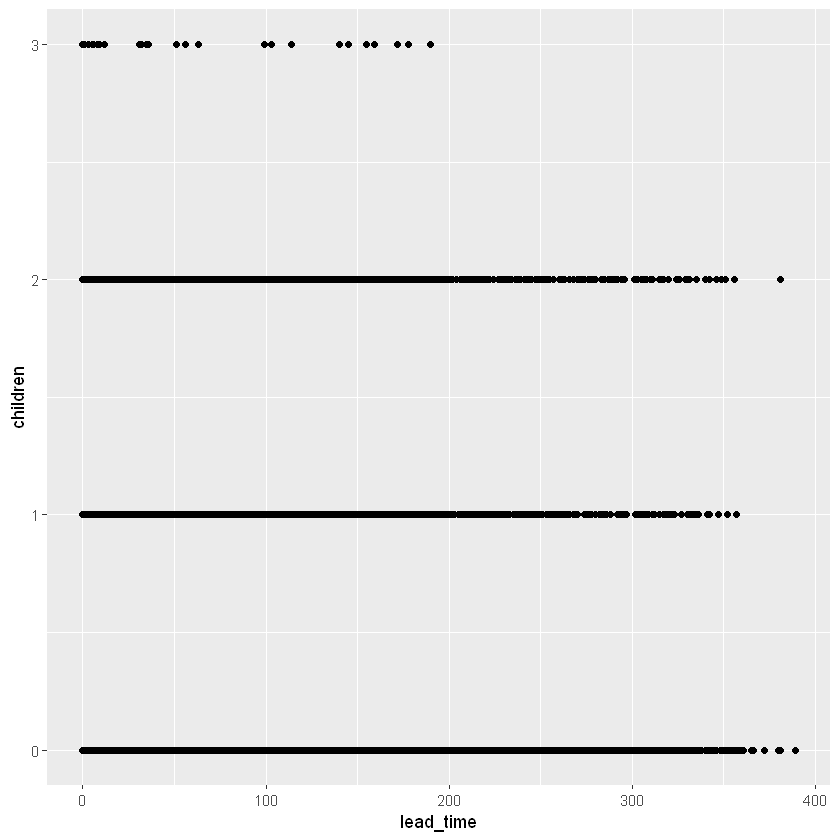

In [30]:
ggplot(data = onlineta_city_hotels_v2) +
  geom_point(mapping = aes(x = lead_time, y = children))